# PetFinder: EDA

In [136]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette('husl')
from wordcloud import WordCloud
import json
import os
from collections import Counter
from PIL import Image
from IPython.display import display

## Content
1. Tabular data
2. Sentiment data
3. On type-breed disagreement

## 1. Basic stats

In [137]:
train_df = pd.read_csv('./data/train/train.csv')
test_df = pd.read_csv('./data/test/test.csv')
merged = pd.concat([train_df.iloc[:, :-1].assign(Dataset='train'),
                    test_df.assign(Dataset='test')])
breeds = pd.read_csv('./data/breed_labels.csv')
colors = pd.read_csv('./data/color_labels.csv')
states = pd.read_csv('./data/state_labels.csv')

In [144]:
train_df.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize      ...        Health  Quantity  Fee  State  \
0             1      ...             1         1  100  41326   
1             2      ...             1         1    0  41401   
2             2      ...             1         1    0  41326   
3             2      ...             1         1  150  41401   
4             2      ...             1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9238e4f44c71a75282e62f7136c6b240         0   
4  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3      1.0   
1  I just found it alone yesterday near my apartm...  6296e909a      2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906      7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5      8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90      3.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  
3              2  
4              2  

[5 rows x 24 columns]

In [139]:
test_df.head()

Type       Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     1      Puppy    2     307       0       1       1       0       0   
1     2     London   24     266       0       1       2       7       0   
2     2   Snowball   20     266       0       2       7       0       0   
3     2     Malibu    5     266     252       2       1       6       7   
4     1  Lala Girl    6     307       0       2       1       2       7   

   MaturitySize    ...     Sterilized  Health  Quantity  Fee  State  \
0             2    ...              2       1         1  150  41326   
1             2    ...              1       1         1    0  41326   
2             2    ...              1       1         1  150  41326   
3             2    ...              1       1         1  100  41326   
4             2    ...              1       1         1  150  41326   

                          RescuerID  VideoAmt  \
0  4475f31553f0170229455e3c5645644f         0   
1  4475f31553f0170229455e3c5645644f         0   
2  4475f31553f0170229455e3c5645644f         0   
3  4475f31553f0170229455e3c5645644f         0   
4  4475f31553f0170229455e3c5645644f         0   

                                         Description      PetID  PhotoAmt  
0  Puppy is calm for a young dog, but he becomes ...  378fcc4fc       3.0  
1  Urgently seeking adoption. Please contact for ...  73c10e136       1.0  
2  Snowball... doesn't look so good (she is healt...  72000c4c5       1.0  
3  Malibu: Female, Local Mix, 4-5 months, vaccina...  e147a4b9f       1.0  
4  LALA! That's my name. I'm a 6 month old girl d...  43fbba852       1.0  

[5 rows x 23 columns]

In [140]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18941 entries, 0 to 3947
Data columns (total 24 columns):
Type            18941 non-null int64
Name            17381 non-null object
Age             18941 non-null int64
Breed1          18941 non-null int64
Breed2          18941 non-null int64
Gender          18941 non-null int64
Color1          18941 non-null int64
Color2          18941 non-null int64
Color3          18941 non-null int64
MaturitySize    18941 non-null int64
FurLength       18941 non-null int64
Vaccinated      18941 non-null int64
Dewormed        18941 non-null int64
Sterilized      18941 non-null int64
Health          18941 non-null int64
Quantity        18941 non-null int64
Fee             18941 non-null int64
State           18941 non-null int64
RescuerID       18941 non-null object
VideoAmt        18941 non-null int64
Description     18927 non-null object
PetID           18941 non-null object
PhotoAmt        18941 non-null float64
Dataset         18941 non-null obje

In [142]:
merged.describe().T

count          mean         std      min      25%      50%  \
Type          18941.0      1.471886    0.499222      1.0      1.0      1.0   
Age           18941.0     10.683966   18.247672      0.0      2.0      3.0   
Breed1        18941.0    264.805871   59.880084      0.0    265.0    266.0   
Breed2        18941.0     70.539201  121.002279      0.0      0.0      0.0   
Gender        18941.0      1.777520    0.683895      1.0      1.0      2.0   
Color1        18941.0      2.233726    1.743388      1.0      1.0      2.0   
Color2        18941.0      3.250515    2.734236      0.0      0.0      2.0   
Color3        18941.0      1.919381    2.996918      0.0      0.0      0.0   
MaturitySize  18941.0      1.854179    0.552772      1.0      2.0      2.0   
FurLength     18941.0      1.467346    0.602049      1.0      1.0      1.0   
Vaccinated    18941.0      1.725463    0.667008      1.0      1.0      2.0   
Dewormed      18941.0      1.547754    0.693462      1.0      1.0      1.0   
Sterilized    18941.0      1.909033    0.570863      1.0      2.0      2.0   
Health        18941.0      1.038066    0.203656      1.0      1.0      1.0   
Quantity      18941.0      1.586558    1.502257      1.0      1.0      1.0   
Fee           18941.0     22.528589   80.637133      0.0      0.0      0.0   
State         18941.0  41347.068634   32.990416  41324.0  41326.0  41326.0   
VideoAmt      18941.0      0.058022    0.356063      0.0      0.0      0.0   
PhotoAmt      18941.0      3.872604    3.517535      0.0      2.0      3.0   

                  75%      max  
Type              2.0      2.0  
Age              12.0    255.0  
Breed1          307.0    307.0  
Breed2          128.0    307.0  
Gender            2.0      3.0  
Color1            3.0      7.0  
Color2            6.0      7.0  
Color3            5.0      7.0  
MaturitySize      2.0      4.0  
FurLength         2.0      3.0  
Vaccinated        2.0      3.0  
Dewormed          2.0      3.0  
Sterilized        2.0      3.0  
Health            1.0      3.0  
Quantity          1.0     20.0  
Fee               0.0   3000.0  
State         41401.0  41415.0  
VideoAmt          0.0      9.0  
PhotoAmt          5.0     30.0

In [8]:
merged.isna().sum()

Type               0
Name            1560
Age                0
Breed1             0
Breed2             0
Gender             0
Color1             0
Color2             0
Color3             0
MaturitySize       0
FurLength          0
Vaccinated         0
Dewormed           0
Sterilized         0
Health             0
Quantity           0
Fee                0
State              0
RescuerID          0
VideoAmt           0
Description       14
PetID              0
PhotoAmt           0
Dataset            0
dtype: int64

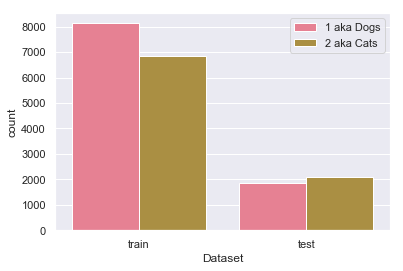

In [10]:
sns.countplot(x='Dataset', data=merged, hue='Type')
plt.legend(['1 aka Dogs', '2 aka Cats'])
plt.show()

In [11]:
merged.Name.sample(n=20)

2502                       Snowy
5623                         Gem
2831                      Hensem
7166     Bobby (Found/Abandoned)
813                        Zorro
1618            4 Little Kitties
800                      Vincent
8262            Sam And The Gang
10357       Spunky Calico Kitten
10359    BOB, CASEY, RUM, SILKY.
2377                      Casper
10154               May & Flower
10586                  4 Sisters
13762                       Mona
5737                         NaN
7684                     Brownie
5826                       Mi Mi
5249          Bob The Gentle Cat
80                     MPSP-F-01
4265                       Mojie
Name: Name, dtype: object

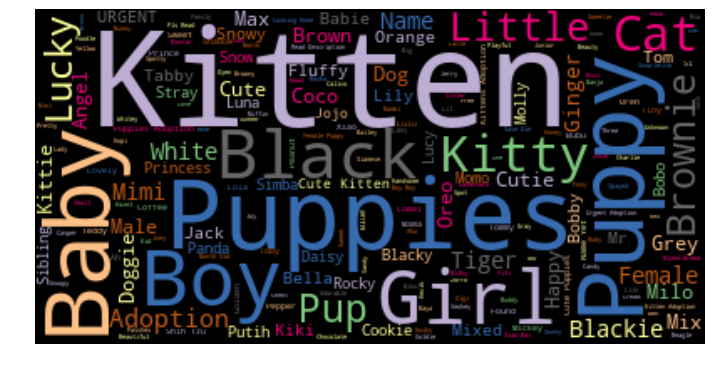

In [12]:
wordcloud = WordCloud(colormap='Accent').generate(' '.join(merged.Name.dropna().tolist()))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

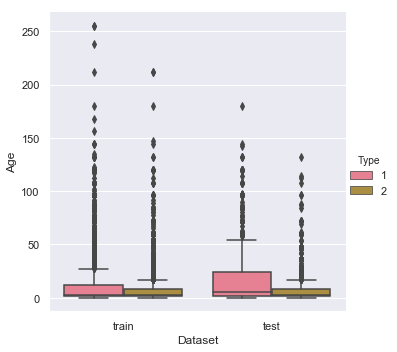

In [79]:
sns.catplot(x='Dataset', y='Age', hue='Type', data=merged, kind='box')
plt.show()

In [124]:
breeds.shape[0]

307

In [83]:
# NAN?????
(merged.Breed1 == 0).sum()

5

In [8]:
# Going to use these
merged[merged.Breed1 == 0].Breed2

391      26
1045    307
3219    266
7285    307
7706    205
Name: Breed2, dtype: int64

In [30]:
(merged.Breed2 == 0).sum()

13840

In [37]:
breed_dict = dict(breeds[['BreedID', 'BreedName']].values)
breed_dict[0] = np.nan

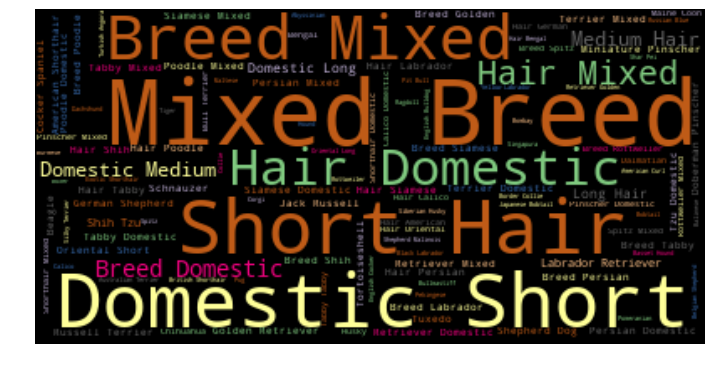

In [245]:
wordcloud = WordCloud(colormap='Accent').generate(' '.join(merged.Breed1.map(breed_dict).dropna()))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

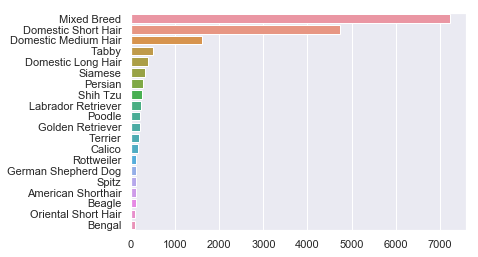

In [246]:
top_breeds = merged.Breed1.map(breed_dict).dropna().value_counts()[:20]
sns.barplot(y=top_breeds.index, x=top_breeds.values, orient='h')
plt.show()

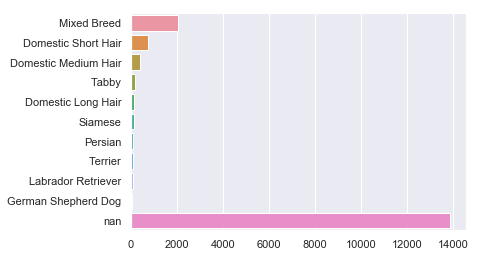

In [248]:
top_breeds = merged.Breed2.map(breed_dict).value_counts()[:10]
top_breeds['nan'] = merged.Breed2.map(breed_dict).isna().sum()
sns.barplot(y=top_breeds.index, x=top_breeds.values, orient='h')
plt.show()

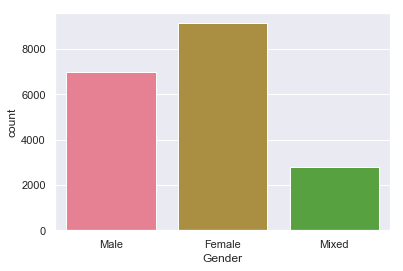

In [159]:
sns.countplot(x='Gender', data=merged)
plt.xticks([0, 1, 2], ['Male', 'Female', 'Mixed'])
plt.show()

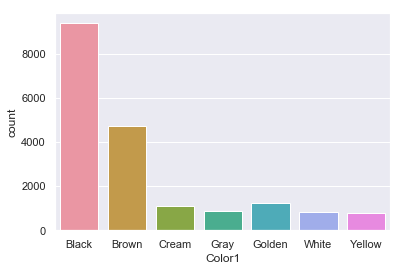

In [249]:
colors_dict = dict(zip(colors.ColorID, colors.ColorName))
colors_dict[0] = 'nan'

sns.countplot(merged.Color1.map(colors_dict))
plt.show()

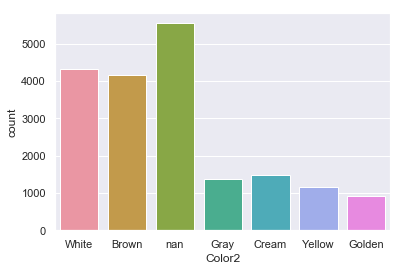

In [250]:
sns.countplot(merged.Color2.map(colors_dict))
plt.show()

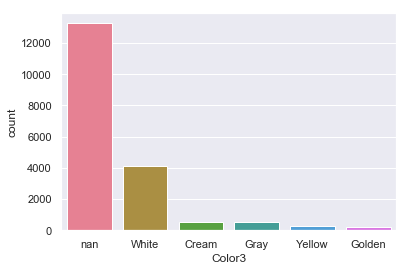

In [251]:
sns.countplot(merged.Color3.map(colors_dict))
plt.show()

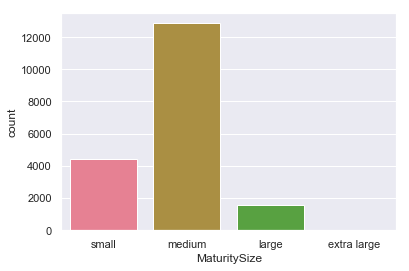

In [202]:
sns.countplot(merged.MaturitySize)
plt.xticks(np.arange(4), ['small', 'medium', 'large', 'extra large'])
plt.show()

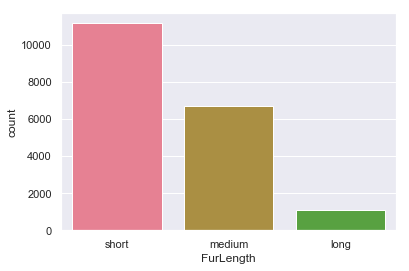

In [204]:
sns.countplot(merged.FurLength)
plt.xticks(np.arange(3), ['short', 'medium', 'long'])
plt.show()

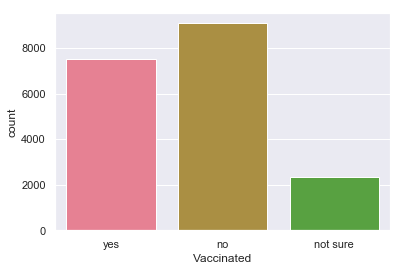

In [211]:
sns.countplot(merged.Vaccinated)
plt.xticks(np.arange(3), ['yes', 'no', 'not sure'])
plt.show()

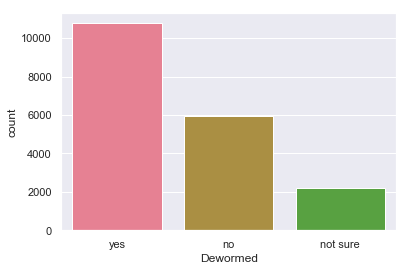

In [212]:
sns.countplot(merged.Dewormed)
plt.xticks(np.arange(3), ['yes', 'no', 'not sure'])
plt.show()

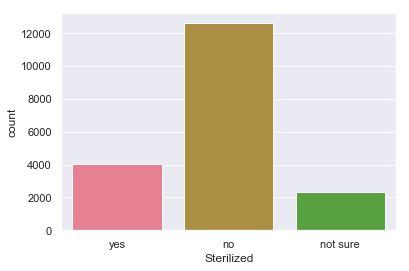

In [213]:
sns.countplot(merged.Sterilized)
plt.xticks(np.arange(3), ['yes', 'no', 'not sure'])
plt.show()

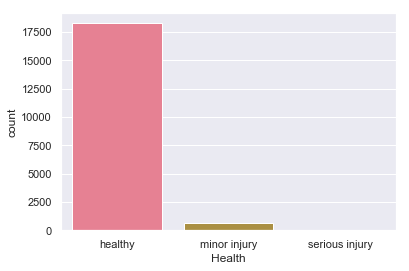

In [217]:
sns.countplot(merged.Health)
plt.xticks(np.arange(3), ['healthy', 'minor injury', 'serious injury'])
plt.show()

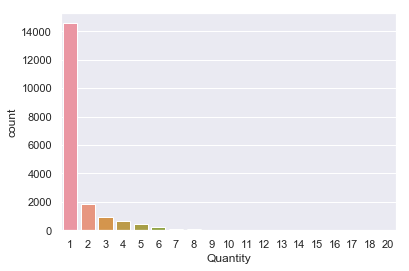

In [221]:
sns.countplot(merged.Quantity)
plt.show()

In [230]:
(merged.Fee == 0).sum()

15863

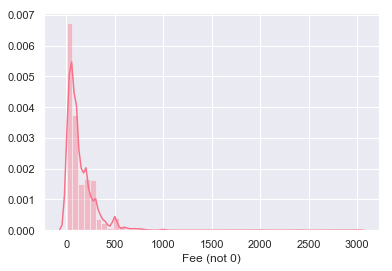

In [235]:
sns.distplot(merged.Fee[merged.Fee != 0])
plt.xlabel('Fee (not 0)')
plt.show()

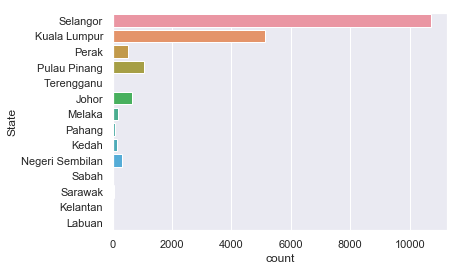

In [257]:
states_dict = dict(zip(states.StateID, states.StateName))
sns.countplot(y=merged.State.map(states_dict), orient='h')
plt.show()

In [7]:
merged.RescuerID.value_counts()[:20]

fa90fa5b1ee11c86938398b60abc32cb    459
aa66486163b6cbc25ea62a34b11c9b91    315
c00756f2bdd8fa88fc9f07a8309f7d5d    231
b53c34474d9e24574bcec6a3d3306a0d    228
ee2747ce26468ec44c7194e7d1d9dad9    156
4475f31553f0170229455e3c5645644f    146
95481e953f8aed9ec3d16fc4509537e8    134
b770bac0ca797cf1433c48a35d30c4cb    111
a042471e0f43f2cf707104a1a138a7df     95
fd970cc91d06d82eebf046340137b272     93
7ed6d84e2e6879245e55447aee39c328     85
0a1ff8402419c5fc2987085711928887     81
e62135526c27156b8479420aad166317     77
438a9bdce8ef4d5948fc40e422d34d0d     75
8b6c5cd067ada5f54ca5ffc7f7b5d896     74
a784899699776c1e71d9bc51bf45459c     74
644449224c6fd82a2dbbc6155ade9aed     67
cccb18b8f8b81862f9a1ebc65d651d22     65
0b19581048b55d65caa01d1d62b93330     64
e6a42485af66a5fbf3f21fc8242fbf57     62
Name: RescuerID, dtype: int64

In [4]:
# !!! No intersection between test and train
np.intersect1d(merged[merged.Dataset=='train'].RescuerID.values, merged[merged.Dataset=='test'].RescuerID.values)

array([], dtype=object)

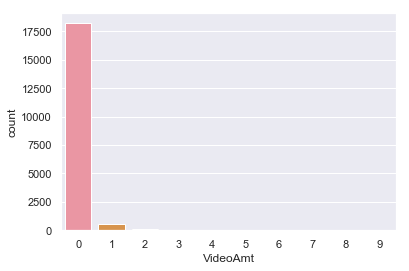

In [11]:
sns.countplot(merged.VideoAmt)
plt.show()

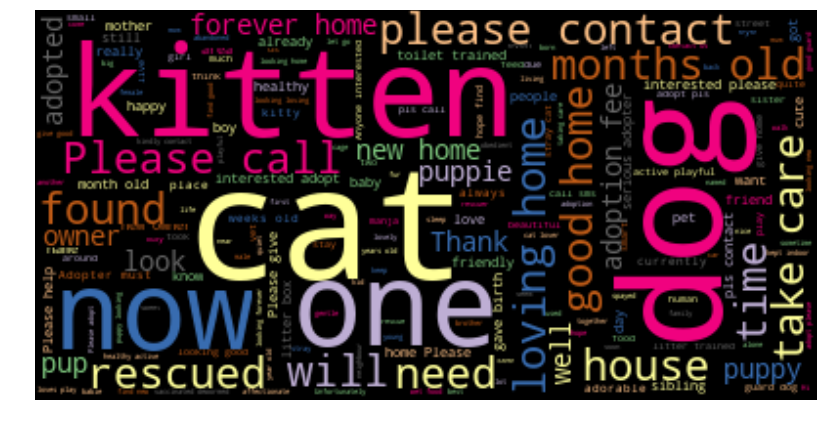

In [145]:
wordcloud = WordCloud(colormap='Accent').generate(' '.join(merged.Description.dropna()))
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [47]:
print('\n\n'.join(merged.Description.sample(3).tolist()))

We found April on the 1st of April, hence the name. She was wandering around Dataran Mentari, Sunway. Her owner has decided to let her go to a better home. Anyone who wishes to adopt this adorable dog please call (Danny)

very cute. very lovable. but i cant take care of him anymore as im living in a rental house and the owner doesnt allowed pets in the house.

I found her on the streets about 3 months ago and she was very frightened and hungry. Since I have cat food, I decided to feed her. Now she's a healthy and playful girl. She's very nice and likes rubbing against people. In other words, she's quite "manja". She knows when she does something wrong as she hides and peeks at you from her hiding spot after a scolding. She enjoys playing 'catching' and hide-and-seek. She'll look at you playfully and when you're near her, she'll turn around and run off, hoping you'll catch and play with her. She knows how to do her business in the cat litre. She has also started hunting for little insec

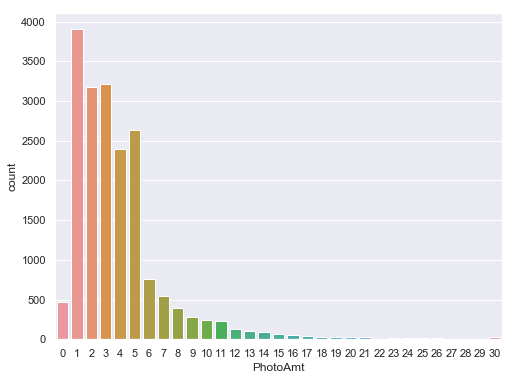

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(merged.PhotoAmt.astype(int), orient='h')
plt.show()

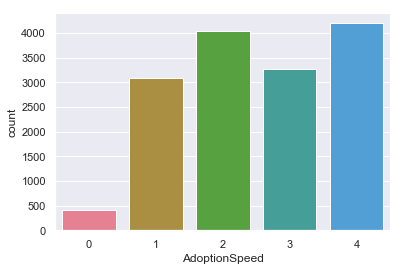

In [62]:
sns.countplot(train_df.AdoptionSpeed)
plt.show()

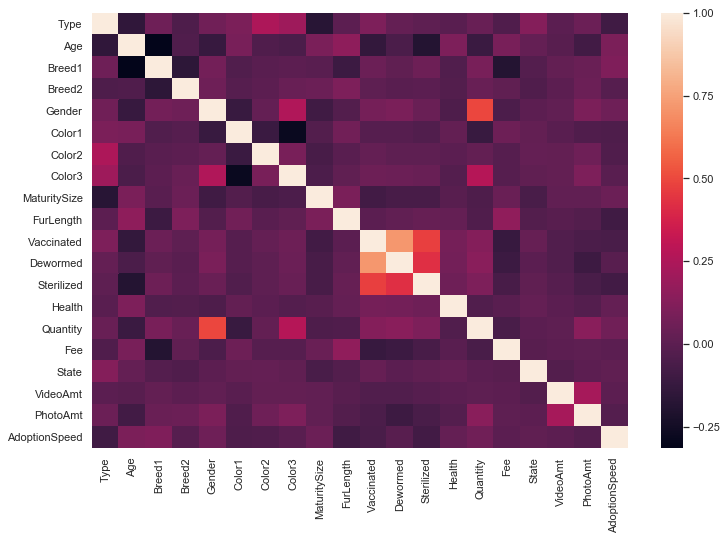

In [76]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr())
plt.show()

## 2. Sentiment data

In [4]:
# Sentiment data fields
train_sent_path = './data/train_sentiment'
test_sent_path = './data/test_sentiment'

with open(os.path.join(train_sent_path, '54c2d49bb.json')) as fp:
     sent_example = json.load(fp)
sent_example.keys()

dict_keys(['sentences', 'tokens', 'entities', 'documentSentiment', 'language', 'categories'])

In [11]:
# `sentences` field example.
# For each sentence returns its `magnitude` and `score`.
# `magnitude`: 0 to inf. Power of emotion. Proportional to length.
# `score`: -1 (negative) to 1 (positive). Emotional leaning.
sent_example['sentences'][2]

{'text': {'content': 'Unfortunately all his brothers and sisters were adopted and Sucky is the last one.',
  'beginOffset': -1},
 'sentiment': {'magnitude': 0.8, 'score': -0.8}}

In [6]:
# `tokens` field. Nothing interesting here.
sent_example['tokens']

[]

In [12]:
# `entities` field.
# Properties of some meaningful nouns. Usefulness is ambiguous.
sent_example['entities'][3]

{'name': 'guy',
 'type': 'PERSON',
 'metadata': {},
 'salience': 0.04041124,
 'mentions': [{'text': {'content': 'guy', 'beginOffset': -1},
   'type': 'COMMON'}]}

In [13]:
# `documentSentiment` field.
# Magnitude and score for the entire text. Looks like the most important feature.
sent_example['documentSentiment']

{'magnitude': 3.1, 'score': -0.2}

In [14]:
# Language of the text.
sent_example['language']

'en'

In [15]:
# Nothing interesting.
sent_example['categories']

[]

In [18]:
# Missing train / test data
train_sent_filenames = os.listdir(train_sent_path)
test_sent_filenames = os.listdir(test_sent_path)
print('Train nans:', np.sum(~train_df.PetID.isin([s.replace('.json', '') for s in train_sent_filenames])))
print('Test nans:', np.sum(~test_df.PetID.isin([s.replace('.json', '') for s in test_sent_filenames])))

Train nans: 551
Test nans: 133


In [19]:
# Some assertions 
# Train
for filename in train_sent_filenames:
    with open(os.path.join(train_sent_path, filename)) as fp:
        sent_json = json.load(fp)
    assert not sent_json['tokens']  # No `tokens` field
    assert not sent_json['categories']  # No `categories` field
    assert sent_example.keys() == sent_json.keys()  # Same keys everywhere
    
# Same for test
for filename in test_sent_filenames:
    with open(os.path.join(test_sent_path, filename)) as fp:
        sent_json = json.load(fp)
    assert not sent_json['tokens']
    assert not sent_json['categories']
    assert sent_example.keys() == sent_json.keys()

In [119]:
# Languages distribution. 'zh-Hant' stands for traditional Chinese.
counter = Counter()
for filename in train_sent_filenames:
    with open(os.path.join(train_sent_path, filename)) as fp:
        sent_json = json.load(fp)
    counter[sent_json['language']] += 1
print('Train:', counter)

counter = Counter()
for filename in test_sent_filenames:
    with open(os.path.join(test_sent_path, filename)) as fp:
        sent_json = json.load(fp)
    counter[sent_json['language']] += 1
print('Test:', counter)

Train: Counter({'en': 14309, 'zh': 95, 'zh-Hant': 36, 'de': 2})
Test: Counter({'en': 3724, 'zh': 83, 'zh-Hant': 7, 'de': 1})


### 2.1. Metadata merging example

In [20]:
# For each file we collect id, magnitude and score of the entire text.
ids = []
mags = []
scores = []
for filename in train_sent_filenames:
    with open(os.path.join(train_sent_path, filename)) as fp:
        sent_json = json.load(fp)
    ids.append(filename.replace('.json', ''))
    mags.append(sent_json['documentSentiment']['magnitude'])
    scores.append(sent_json['documentSentiment']['score'])

# Making a dataframe.
train_doc_sent_df = pd.DataFrame({'PetID':ids, 'magnitude':mags, 'score':scores})
train_doc_sent_df.head()

PetID  magnitude  score
0  b5e7e4539        0.5    0.0
1  41e824cbe        8.3    0.2
2  0833744e6        2.9    0.3
3  fc229a9d7        1.7    0.4
4  3589a8a0d        0.9    0.9

In [22]:
# Merging with train DF. Using left outer join since we have nans for some ids.
train_df_with_doc_sent = pd.merge(train_df, train_doc_sent_df, how='left', on='PetID')
train_df_with_doc_sent.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...    Fee  State                         RescuerID  \
0             1  ...    100  41326  8480853f516546f6cf33aa88cd76c379   
1             2  ...      0  41401  3082c7125d8fb66f7dd4bff4192c8b14   
2             2  ...      0  41326  fa90fa5b1ee11c86938398b60abc32cb   
3             2  ...    150  41401  9238e4f44c71a75282e62f7136c6b240   
4             2  ...      0  41326  95481e953f8aed9ec3d16fc4509537e8   

   VideoAmt                                        Description      PetID  \
0         0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3   
1         0  I just found it alone yesterday near my apartm...  6296e909a   
2         0  Their pregnant mother was dumped by her irresp...  3422e4906   
3         0  Good guard dog, very alert, active, obedience ...  5842f1ff5   
4         0  This handsome yet cute boy is up for adoption....  850a43f90   

   PhotoAmt  AdoptionSpeed magnitude  score  
0       1.0              2       2.4    0.3  
1       2.0              0       0.7   -0.2  
2       7.0              3       3.7    0.2  
3       8.0              2       0.9    0.9  
4       3.0              2       3.7    0.6  

[5 rows x 26 columns]

## 3. On type-breed disagreement

In [74]:
# Pets with breeds which don't correspond to their type.
breeds_by_type = {t: breeds[breeds.Type == t].BreedID.values for t in (1, 2)}
def check_type_breed(row):
    breed1_fail = row.Breed1 not in breeds_by_type[row.Type] and row.Breed1 != 0
    breed2_fail = row.Breed2 not in breeds_by_type[row.Type] and row.Breed2 != 0
    return breed1_fail or breed2_fail
train_strange_type_breed_ids = train_df[train_df.apply(check_type_breed, axis=1)].PetID.values
test_strange_type_breed_ids = test_df[test_df.apply(check_type_breed, axis=1)].PetID.values
train_strange_type_breed_ids, test_strange_type_breed_ids

(array(['1bc0f89d8', '15a206d0d', 'f8654865f', '36b20cfb5', '699a81c51',
        '85ec1aac0', '6a72cfda7', '6c399cb06', '504134fd6', '44f198a24',
        '7ec261d88', '40dfeeb65'], dtype=object),
 array(['f2847575d', '3bb3c3f41', '199ae3a3d', 'c1509a54e', '66b38c4a7'],
       dtype=object))

        PetID  Type  Quantity
22  1bc0f89d8     2        10
Name: Kenit, Kenot, Techit, Keyad, Owen
My cats name is Kenit, Kenot,Owen, Keyad, Manja, Techit and 4 Kittens, Baby and family. All my cats are pamper.
Greyhound , nan
          PetID  Type  Quantity
1603  15a206d0d     2         1
Name: Shuka
so cute and kind
Belgian Shepherd Laekenois , nan


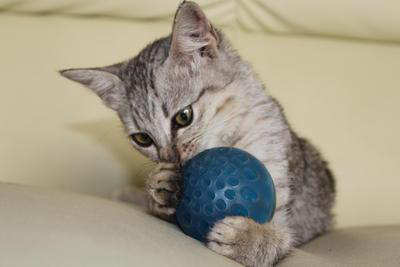

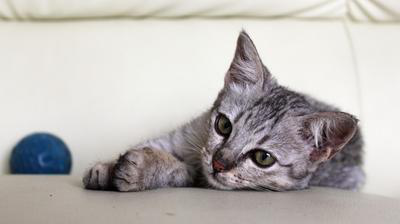

          PetID  Type  Quantity
1638  f8654865f     2         5
Name: Mi Cai 2
New born baby cats 2 weeks time..at my house all five of them are males
Bearded Collie , Bearded Collie


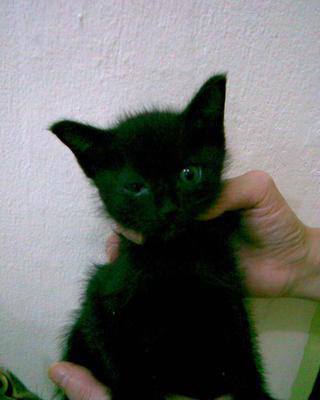

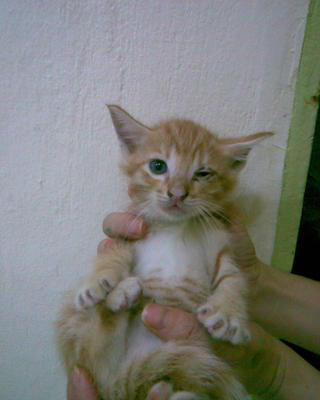

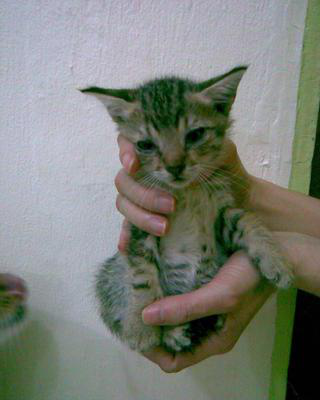

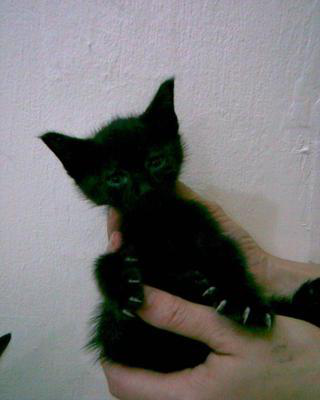

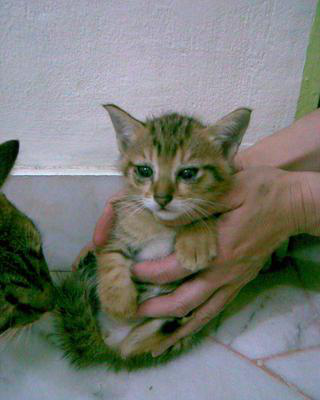

          PetID  Type  Quantity
3783  36b20cfb5     2         2
Name: nan
THERE ARE FOUR KITTENS GINGER, BLACKIE, SILVER, TUTU THE MOTHER IS A PART SIAMESE LILAC POINT I LIVE IN A CONDO AND I HAVE TO FIND HOMES FOR THE KITTENS WELL FED, CLEAN AND VERY LIVELY AND LOVABLE I AM MAGGIE, TEL KL AMPANG HILIR,
Belgian Shepherd Laekenois , nan
          PetID  Type  Quantity
4233  699a81c51     2         1
Name: Mo-Joe
Mo-joe is adopted and is in good hand with sofia..im proud of him in any where coz even he so cute and adorable, he is the most behave kitten i have..the cutest among all..Mummy wish u all the best in your life baby..of coz u not going to be a lawyer or something.. :) but mummy hope you will grow up as a good gentlemen..love ya.
Terrier , Terrier


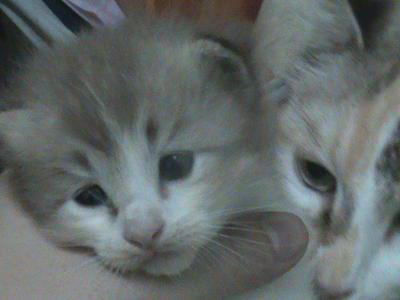

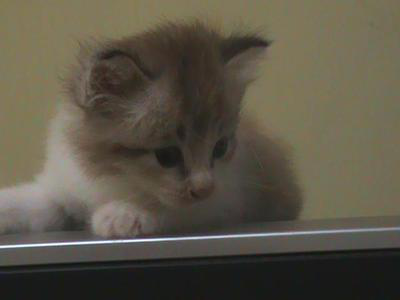

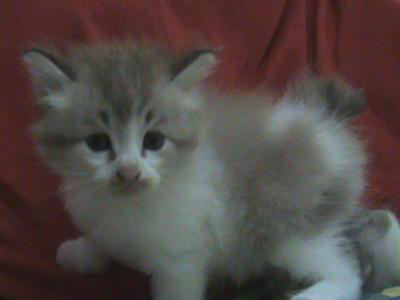

          PetID  Type  Quantity
6650  85ec1aac0     2         1
Name: Munchi
He's very naughty and cute ..
Australian Kelpie , nan


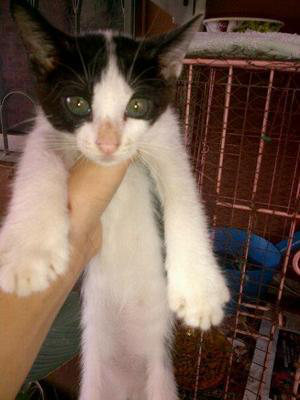

          PetID  Type  Quantity
7300  6a72cfda7     2         1
Name: Mao Mao
i rescued mao mao last two weeks or 3 weeks ago. She was very small but able to survive and now is so healthy. She is a frend to sister beline, merry and berry..adopted together with Merry on 9 Jan . mummy pray for ur happiness mao2..so too Merry. Take care of each other k.
Collie , Akita


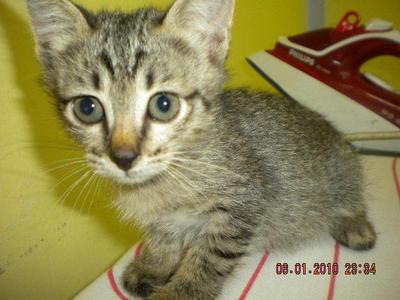

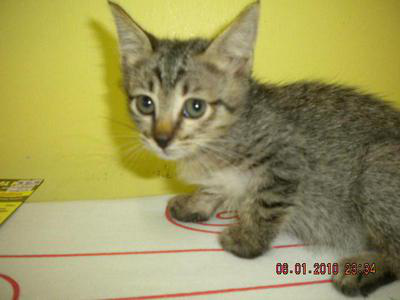

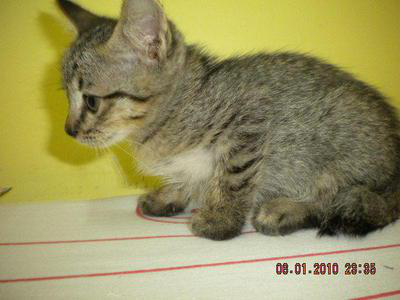

          PetID  Type  Quantity
8852  6c399cb06     2         1
Name: Bobby The Smiling Shih Tzu
How he was found: Bobby was abandoned and was roaming around our neighbourhood one rainy afternoon - all the kids were mad happy upon his arrival. People played with him, but, as night came and heavy rain poured in, all the doors were shut and nobody let the dog in. He was begging for shelter from house to house. Bobby's conditions (health, behaviour, friendliness & etc.): Bobby is a friendly dog who enjoys being petted and brushed. He is also very playful and he requires being taken out for a walk everyday. When we first found him, his health was at a very bad stake. He smelled bad and his fur all matted. He had sensitive stomach - he suffered from diarrhoea during the first week and couldn't digest kibbles. We fed him boiled chicken/liver and very soft rice for a fortnight and now he can eat anything (healthy for a dog). I trimmed his fur the first week and brush him on a daily basis. Now

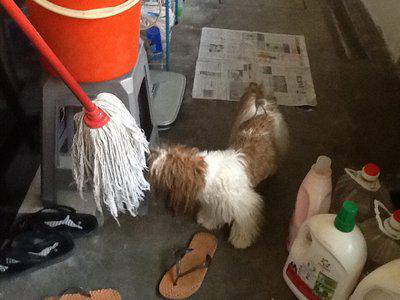

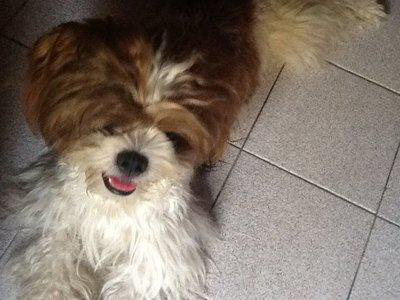

           PetID  Type  Quantity
10911  504134fd6     2         3
Name: Kittens Encik Faisal
Ada 3 ekor kitten d kedai nasi ayam faisal di kampung padang jawa seksyen 16 shah alam. Dua ekor sihat...seekor kurang sihat yg perlu pertolongan utk dibawa krn vet. Kontek terus en faisal utk adopt kittens ni. Tq Hp : en faisal
Mixed Breed , nan


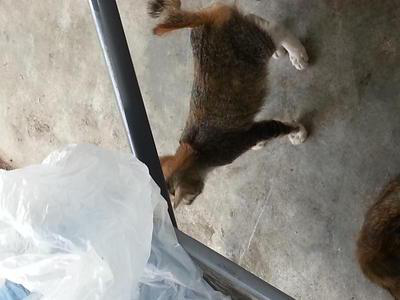

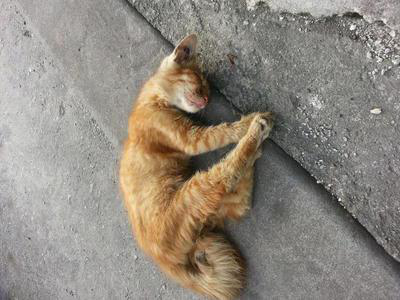

           PetID  Type  Quantity
13686  44f198a24     2         1
Name: Tabby
I just rescue this kitty at pm near my apartment,she beg for food,keep follow me while i dog run my dog with me,current this kitty temporary keep by my aunty because I be away from //. Please contact Wendy if would could give her home,tq.
Mixed Breed , nan


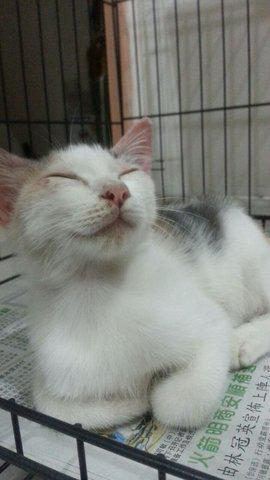

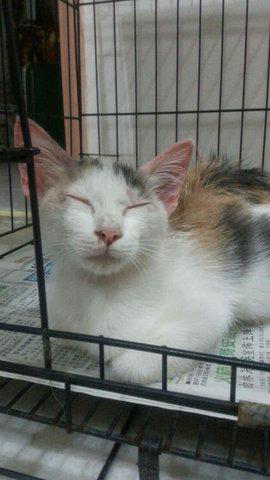

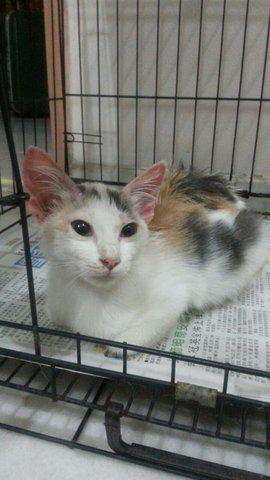

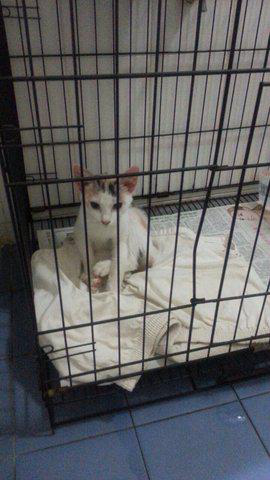

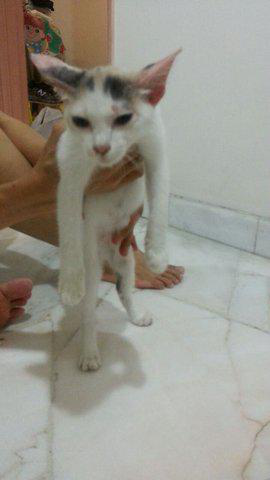

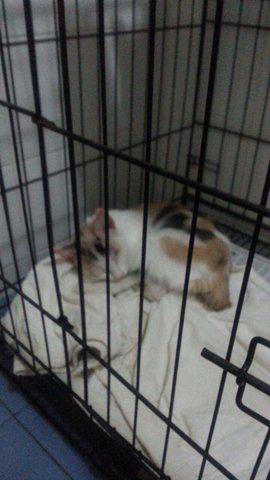

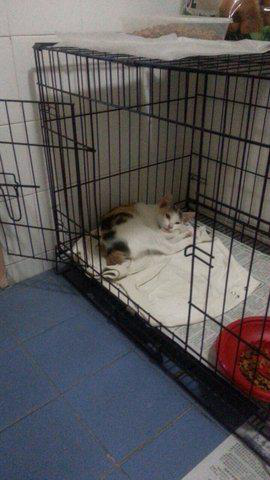

           PetID  Type  Quantity
14058  7ec261d88     2         1
Name: Mizamo
very cut very lovely very nice for people
Mixed Breed , nan


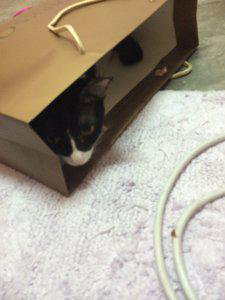

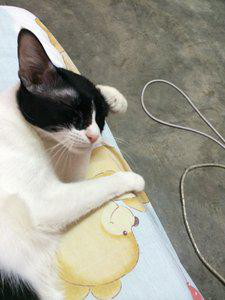

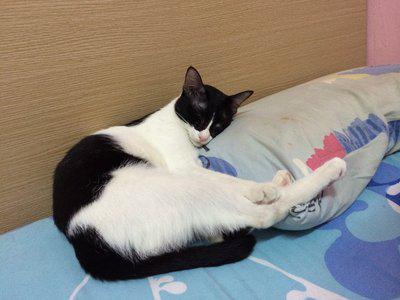

           PetID  Type  Quantity
14470  40dfeeb65     2         1
Name: Mr.Mishoo
Hello ,My name is Mishoo, I 'm a one month black and white kitty...My momy loves me so much...but she described to me because she has asthma ...and her asthma attacks are becomg more and more after adopting me ,she cant take care of me any more...so I m searching for a new happy family.i am a calm but also nauthy boy...i love toplay a a lot...i am also so smart I drink catmilk in bowl and know how to use sand box...I m waiting for your call..PLZ adoptme if you really really can love me :) and take care of me
Mixed Breed , nan


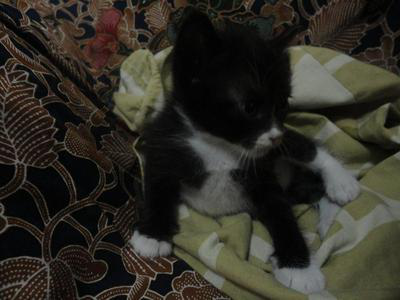

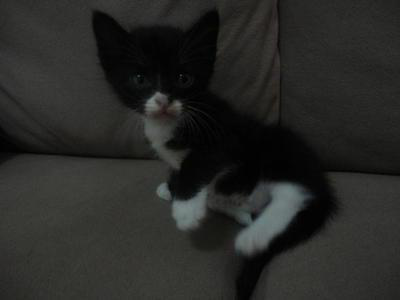

In [117]:
# Train set type-breed disaggreement exploration.
img_path = './data/train_images'   
for pet_id in train_strange_type_breed_ids:
    pet_row = train_df[train_df.PetID == pet_id]
    print(pet_row[['PetID', 'Type', 'Quantity']])
    print('Name:', pet_row.Name.values[0])
    print(pet_row['Description'].values[0])
    print(breed_dict[pet_row.Breed1.values[0]], ',', breed_dict[pet_row.Breed2.values[0]])
    for img_name in os.listdir(img_path):
        if pet_id in img_name:
            img = Image.open(os.path.join(img_path, img_name))
            display(img)

          PetID  Type  Quantity
2230  f2847575d     2         1
Name: Toby
This is a very cute male cat , around 2 yrs of age. the owners have abandoned the cat and he is homeless.. he was previously a home cat , litter box trained and only eats good cat food.. currently living on the streets and begging for food. it breaks my heart to see such irresponsible ppl having pets and they dont care about. i hope someone can give toby a home , if they prefer adult cats then kittens , Then Toby is the one for you. pls call me if interested , i will putting up pics of Toby really soon.
Mixed Breed , nan
          PetID  Type  Quantity
3132  3bb3c3f41     2         2
Name: Patch And Spot
They were born on the 28th Nov . There were 4 kittens , two were adopted. 2 weeks ago. Their mom was a stray which my family rescued from the drain. The kittens are intelligent, lovable and healthy. They are trained to use the cat sand.
Mixed Breed , nan
          PetID  Type  Quantity
3187  199ae3a3d     2     

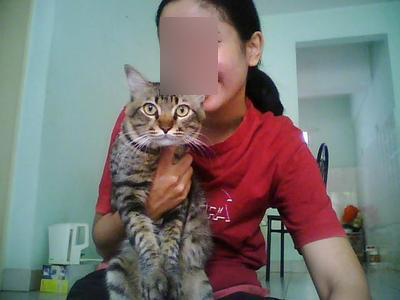

          PetID  Type  Quantity
3596  66b38c4a7     2         1
Name: Bubu
I found this tiny kitten 4 days ago at the mosque while we were on the way back to KL from hari raya break..he looked sick, hungry, got eye problem, flu and so dirty...my hubby likes cat but he does not prefer to keep him at home..when we were about to leave the mosque, the kitten ran to catch my son and it accidently fell in the drain. We then decided to bring it home...this little guy was then brought to see vet and the vet said...it's not easy to look after this kitten since it is only 1 month old...it needs full attention...so, i think i need to give up this kitten since i know i cannot devote that much time for him....please suggest me a good place for him, he's a baby...
Belgian Shepherd Dog Sheepdog , nan


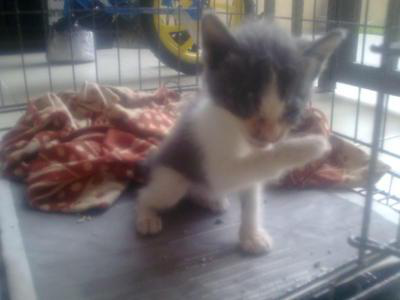

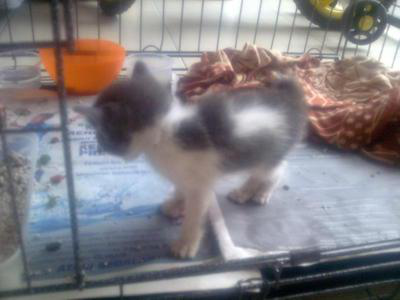

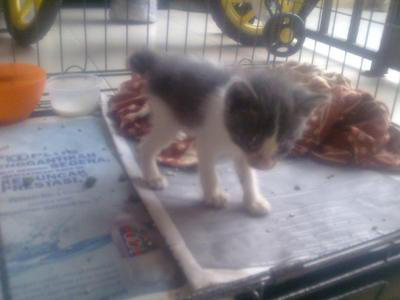

In [135]:
# Test set type-breed disaggreement exploration.
img_path = './data/test_images'   
for pet_id in test_strange_type_breed_ids:
    pet_row = test_df[test_df.PetID == pet_id]
    print(pet_row[['PetID', 'Type', 'Quantity']])
    print('Name:', pet_row.Name.values[0])
    print(pet_row['Description'].values[0])
    print(breed_dict[pet_row.Breed1.values[0]], ',', breed_dict[pet_row.Breed2.values[0]])
    for img_name in os.listdir(img_path):
        if pet_id in img_name:
            img = Image.open(os.path.join(img_path, img_name))
            display(img)

### 3.1 So what?

In [ ]:
# Replace Breed1 with 0
['1bc0f89d8', '15a206d0d', 'f8654865f', '36b20cfb5', '699a81c51', '85ec1aac0',
 '6a72cfda7', '199ae3a3d', '66b38c4a7']

# Replace Breed2 with 0
['f8654865f', '699a81c51', '6a72cfda7']

# Change Type to 1
['6c399cb06']